LEARNERS:
- Master to PhD (possibly Post Doc) students
- little computational skills and little programming skills in python
- likely researchers in mathematics, statistics, computing, biology and agriculture 
- approx 30 students


LEARNING OBJECTIVES:
- Name the basic packages and functions used for data analysis & plotting
  - (!) Explain how to create DataFrames / Series in pandas
- Name the different types of graphs and which functions to use in python
  - (!) Name additional graph types

- Summarise the elements of a graph (including fig, ax)
  - (!) Give examples of additional graph personalisation with matplotlib (e.g. second y-axis)
- Give examples of different graphical elements used for highlighting & differentiating dimensions
- Discuss the pros & cons of certain graph types (boxplot, pie chart)

- For a given dataset, produce a certain graph
  - (!) second/ more complex dataset

- Compare different visualisations of a given dataset
- (!) Analyse a given dataset and write down the main conclusions
- (!) Find and correct errors in a given code

Including statistics (?)
- List & describe fundamental statistical evaluations
- Discuss the use of the t-test/anova as general purpose statistics


IMPORTANT NOTES
- Remember sandwich rule of input, output, and breaks
- Early on clarify
  - objectives
  - structure
  - **relevance**

## Presentations
1. Introduction
   - Introduce facilitators
   - Learning objectives
   - Session structure
   - Stress **relevance** -> example pictures of good/bad graphs
2. Matplotlib & Graph types
   - Syntax of matplotlib (object oriented: fig, ax)
   - Graph types and what to use them for
3. 

# Pandas

You have now already learned about calculations and data analysis using the package `numpy`.  
While numpy is fast, it's data structure is not annotated and thus not how we would usually handle data.

An alternative is `pandas`, a data handling and analysis package.
Load it using

In [2]:
import pandas as pd

so that we can use `pandas` with the abbreviation `pd`.  
`pandas` introduces the new data types
- `Series`: an annotated vector and
- `DataFrame`: an annotated matrix with rows ("index") and columns (we will focus on this one)

The structure of the latter sounds very much like an excel-like spreadsheet and we can easily read in data that has this structure (like excel, csv, tsv) using functions like `pd.read_<filetype>`

In [3]:
pd.read_csv("data/example_dataset.csv")

,cell_id,genotype,size
0,1,WT,3.92
1,2,WT,3.09
2,3,WT,3.35
3,4,MUT1,4.05
4,5,MUT1,4.35
5,6,MUT1,4.88
6,7,MUT2,4.30
7,8,MUT2,3.70
8,9,MUT2,3.15


In [4]:
pd.read_table("data/example_dataset.tsv", sep="\t")

,cell_id,genotype,size
0,1,WT,3.92
1,2,WT,3.09
2,3,WT,3.35
3,4,MUT1,4.05
4,5,MUT1,4.35
5,6,MUT1,4.88
6,7,MUT2,4.30
7,8,MUT2,3.70
8,9,MUT2,3.15


In [5]:
# This function might produce an error
# If so, see the cell below
pd.read_excel("data/example_dataset.xlsx")

,cell_id,genotype,size
0,1,WT,3.92
1,2,WT,3.09
2,3,WT,3.35
3,4,MUT1,4.05
4,5,MUT1,4.35
5,6,MUT1,4.88
6,7,MUT2,4.30
7,8,MUT2,3.70
8,9,MUT2,3.15


The last cell might have produced an error. If so, open a terminal and type 
```bash
pip install openpyxl
```
Then rerun the  previous cell

## Penguin data <img src="https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/man/figures/logo.png" style="max-width: 500px" align="right">


This was only meaningless example data, so lets load a real dataset.  
This is even possible directly from a website (as long as you have access to it)

Here, we are going to use the `palmerpenguins` dataset, a study conducted on antarctic penguins between 2007 and 2009.  
There, they measured the penguins height, flipper and bill dimensions and many other dimensions.

<img src="https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/man/figures/culmen_depth.png" style="max-width: 500px">

In [6]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv"
)

The data is now loaded under the name `df` and we can take a look at it.  
Type `df.head()` to see the first few rows of the DataFrame.

In [7]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


# Indexing
Like with lists you have to use indexes or slices in square brackets `[]` to access single values or subsets of the DataFrame.  
However, in pandas you have to write `.loc` before that, otherwise it will access the columns by default.  
To get what is in the first row, for example, you type `df.loc[0]`

In [8]:
df.loc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       male
year                      2007
Name: 0, dtype: object

And to access the *first three rows*, you type `df.loc[0:2]`.  
Try out a few of these slices and see if you access what you think you would (compare to your `.head()` printout above).  
Do you notice a difference to indexing with lists?

In [9]:
df.loc[0:2]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


### Exercise 1.1
1. Of which species are the penguins 220-225? On which island were they caught?
2. (optional) Find the point in the data where the species of the penguins changes from Gentoo to Chinstrap
3. (optional) There are two penguins for which these measurements weren't recorded (`NA`), find them 

In [10]:
df.loc[300]

species              Chinstrap
island                   Dream
bill_length_mm            46.7
bill_depth_mm             17.9
flipper_length_mm        195.0
body_mass_g             3300.0
sex                     female
year                      2007
Name: 300, dtype: object

Now, to restrict also the columns to subsets of columns or single values, use the syntax `.loc[<row(s)>, <column(s)>]`.  
For example, to get the species if the second penguin, write `df.loc[2, "species"]`.  
Note that you use the *name* of the column to access it (actually, we have been using the row names also up until now).  
You can also input a list of row and/or column names in the respective position to be even more specific, try for example `.loc[:, ["species", "year"]]`

Using this notation, we can access almost anything we desire in the data and we can now start to use other functions on it to begin analysis.  
For example, the `value_counts` method counts the occurrences of each unique entry.  
If you select a column or subset with numerical values, you can also directly calculate the `max`, `min`, `mean`, `sum`, ... .

### Exercise 1.2
1. How many penguins were recorded each year?
2. What is the maximum flipper length?
3. How many penguins of each species were found per island? (Tip: try selection two columns and then using `value_counts`)
4. (optional) Get the median body mass of the first 20 penguins.
5. (optional) Find a function that outputs if a value is `NA` (Tip: type `df.` and then the tab key to search for a function that sounds right)

## Not Available (NA) or Not a Number (NaN)

As we have just noticed there are `NA`s, so missing values, in our data.  
This can happen because the value was just not measured or because a calculation returned with a value that is Not a Number (`NaN`, i.e. division 0/0).  
It's important to know that they are there and to decide on how to deal with them.  
**By default pandas will ignore them in most applications like sum, mean, etc.**  
In this case, let's redeefine our data by removing the `NA` containing rows.  
The `pandas` function for that is `dropna`.

In [11]:
df = df.dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


## Plotting with Pandas (short)

With out newly cleaned data we can now try a bit more data analysis.

Pandas by itself can be used for plotting by using the `plot` method of our DataFrame.  
We won't be going into much detail with it, but it is very handy to make a fast and easy plot.

For example, we can make a histogram and look at the

Let's make a slightly more complex and plot the number of penguins per year that we counted before.  
For that we apply first the `value_counts` method and then the `plot` right after.

<Axes: xlabel='island'>

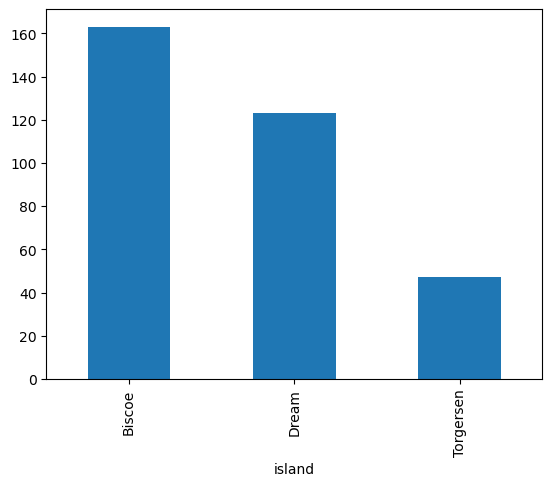

In [12]:
df.value_counts("island").plot(kind="bar")

Note that to make it easier to read I added line breaks after each operation.  
In Python you can only do that if you put the code into parentheses `()`

<Axes: xlabel='island'>

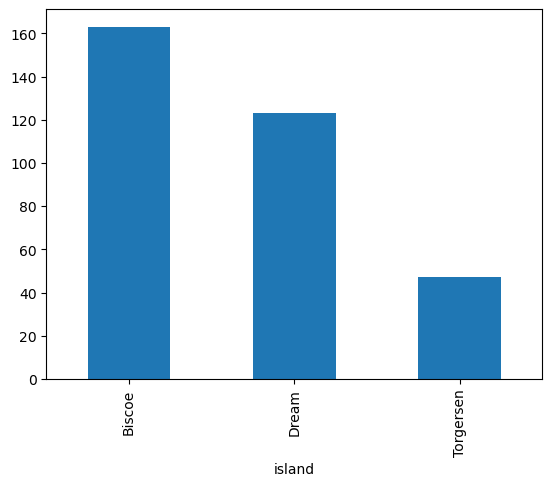

In [13]:
(
    df
    .value_counts("island")
    .plot(kind="bar")
)

### Exercise 1.3
1. Make a bar graph with how many penguins were recorded each year.
2. What is the maximum flipper length?

### Groupby

One very powerful technique to work on data is to split it into different groups, applying a function on each group and then combining the results of each operation again.  
Pandas has a function called `groupby` which can be used for this.  

In the example below, we will 

1. group the Penguins by their sex
2. select the bill length column
3. calculate the *mean value* of that column

In this way you can show if there are differences *between the two groups*


In [14]:
(
    df
    .groupby("sex")
    ["bill_length_mm"]
    .mean()
)

sex
female    42.096970
male      45.854762
Name: bill_length_mm, dtype: float64

We can plot this result directly as a barplot:

<Axes: xlabel='sex', ylabel='Bill length'>

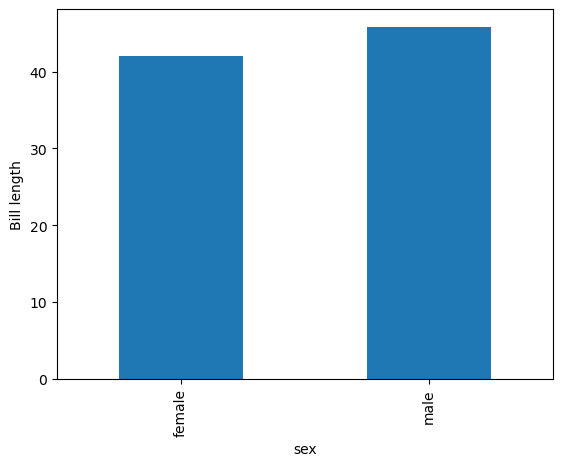

In [15]:
(
    df
    .groupby("sex")
    ["bill_length_mm"]
    .mean()
    .plot(
        kind="bar", 
        ylabel="Bill length"
    )
)

----
## Checkpoint
Please indicate when you arrive at this point as we would like to have a **short presentation**

----

## Data Visualisation with Seaborn
Now that you have heard about all of these plotting types, we can explore how they are created in python.

### Histogram
A histogram is an easy way to visualise the distribution of our data.  
There are methods to plot directly from a dataframe, however we will show you another very user friendly package for plotting: `seaborn`

Let's import seaborn and plot a histogram using the function `histplot`

In [16]:
import seaborn as sns

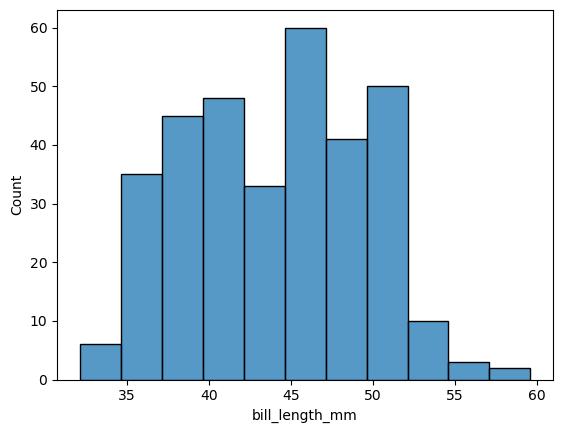

In [17]:
ax = sns.histplot(df, x="bill_length_mm")

Imagine you saw the plot above in someone elses work, would you be satisfied with it?  
No! It is lacking a label for the x-axis and a title!  
Let's fix that.

For this, let's use the syntax of matplotlib with `ax` (and `fig`)

Text(0.5, 1.0, 'Bill length distribution')

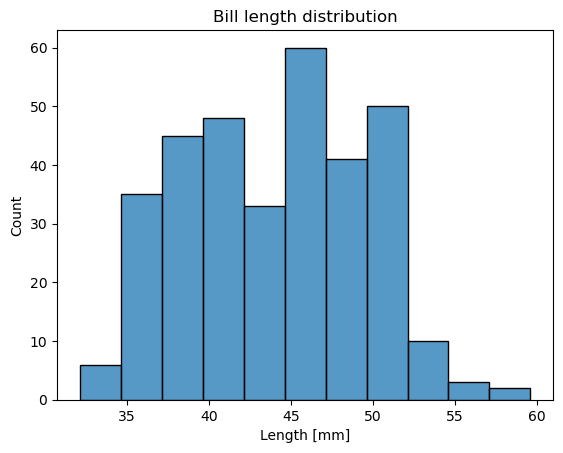

In [18]:
ax = sns.histplot(df, x="bill_length_mm")
ax.set_xlabel("Length [mm]")
ax.set_title("Bill length distribution")

### Exercise 2.1
1. Plot a histogram of the flipper length (with correct axis annotation).<br>Do you see something interesting? Can you think of a reason for the distribution shape?
2. (optional) Plot histograms for the other variables and observe their distributions. What do you observe?
3. (optional) As mentioned, there is a method (actually multiple related ones) of plotting directly from our DataFrame `df`. Try to find out how and plot a histogram that way.

Text(0.5, 1.0, 'Flipper length distribution')

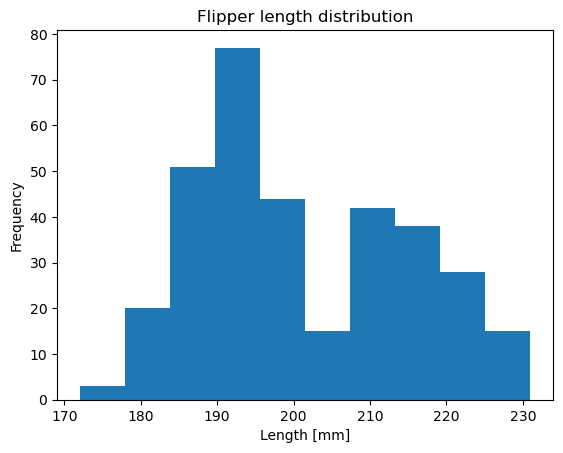

In [19]:
# Exercise 2.1-3 Selecting the plotted column prior
ax = df["flipper_length_mm"].plot(kind="hist")
ax.set_xlabel("Length [mm]")
ax.set_title("Flipper length distribution")

Text(0.5, 1.0, 'Flipper length distribution')

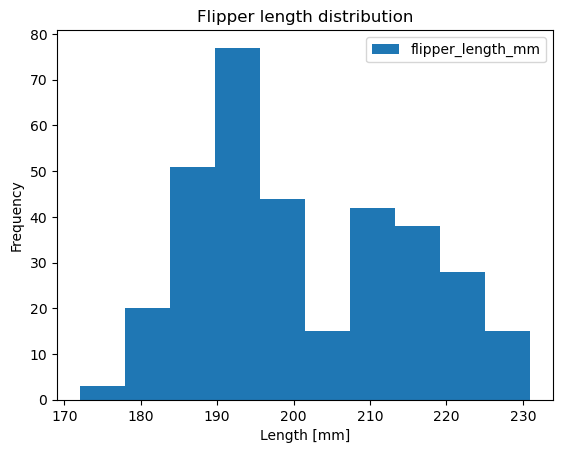

In [20]:
# Exercise 2.1-3 Selecting the plotted column within the method call
ax = df.plot(y = "flipper_length_mm", kind="hist")
ax.set_xlabel("Length [mm]")
ax.set_title("Flipper length distribution")

### Scatter plot
Assume now you have two two continuos variables you want to plot against eachother.  
For example, you hypothesise that overall larger penguins have a higher flipper length.  
Often  scatter plot is often the easiest choice:

For this, specify the columns you want plotted as `x` and `y` and use the `scatterplot` function.

Text(0.5, 1.0, 'Flipper length distribution')

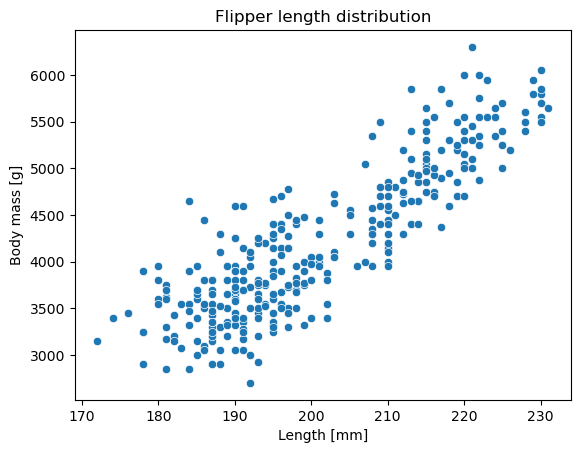

In [21]:
ax = sns.scatterplot(df, x="flipper_length_mm", y="body_mass_g")

ax.set_xlabel("Length [mm]")
ax.set_ylabel("Body mass [g]")
ax.set_title("Flipper length distribution")

### Exercise 2.2
1. Plot the flipper length against the bill depth. How do you explain this behaviour?
2. Other variables show a similar pattern when plotted against each other. Find another example.
3. (optional) The seaborn `scatterplot` can also use nominal variables (like the island names). Make a plot with such a column. What can you see? Does this type of plot make sense here?

Text(0.5, 1.0, 'Flipper length distribution')

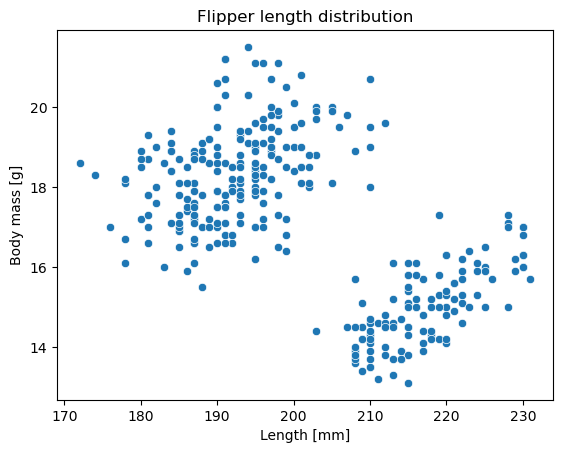

In [22]:
ax = sns.scatterplot(df, x="flipper_length_mm", y="bill_depth_mm")

ax.set_xlabel("Length [mm]")
ax.set_ylabel("Body mass [g]")
ax.set_title("Flipper length distribution")

<Axes: xlabel='island', ylabel='bill_depth_mm'>

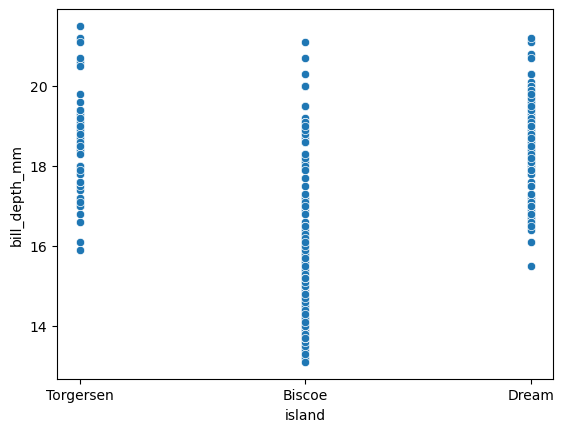

In [23]:
sns.scatterplot(df, x="island", y="bill_depth_mm")

### Pair Plot

If you start out with a multi-variable dataset and want to explore relationships within, it would be a good idea to use the previous plot types and systematically plot all distributions and pairwise relations.  
Luckily, there is a function for that: `sns.pairplot`

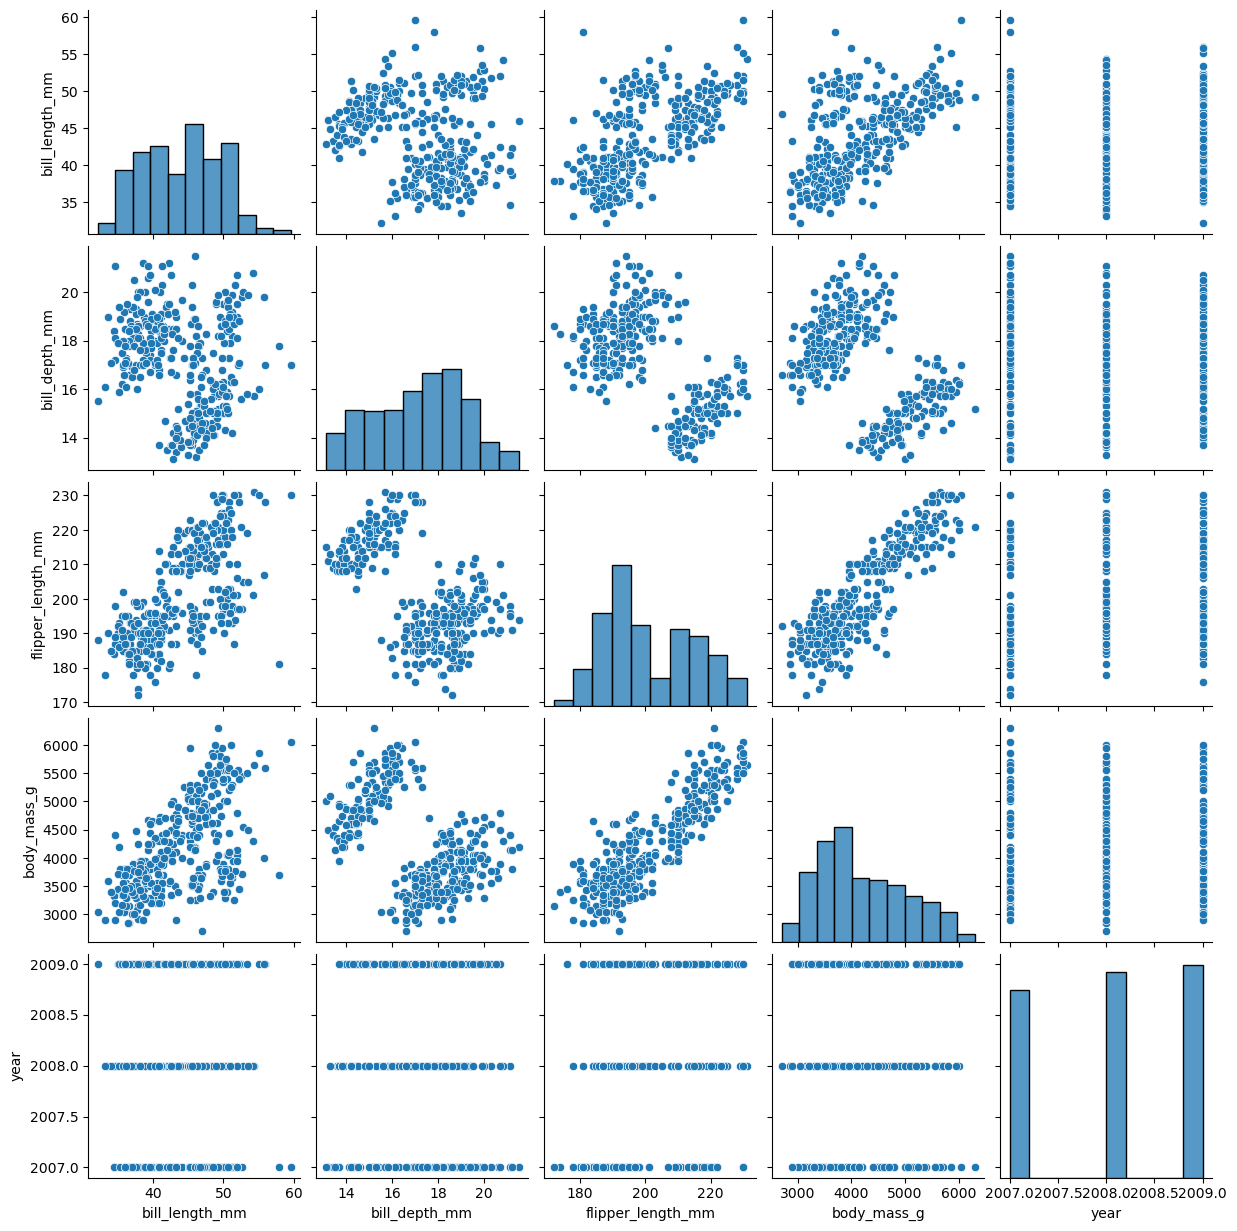

In [24]:
axes = sns.pairplot(df)

Yo can see that at the intersection rows and columns with the identical label, that variable is plotted as a histogram and all other pairs are scatter-plotted.  
From here, you might find a relationship that sounds interesting to you and that you can investigate further.  

Do you notice something *missing* in this previous plot?

###  Line plot
Line plots are very common if you have one variable clearly dependent on another one, say a penguins *number* over *time*.  
In this dataset, let's plot the counts of penguins on the different islands over the years!

Text(0, 0.5, 'Number of Penguins measured')

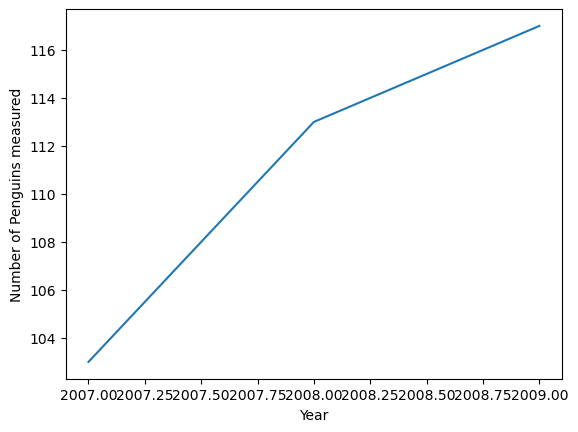

In [42]:
ax = sns.lineplot(df.value_counts("year"))

ax.set_xlabel("Year")
ax.set_ylabel("Number of Penguins measured")

This plot however makes it seem like there are huge changes between the years because the y-axis is so zoomed in.  
Lets set the lower limit to `0`.  
Let's also fix the x-axis ticks, since we're only interested in the full years

Text(0, 0.5, 'Number of Penguins measured')

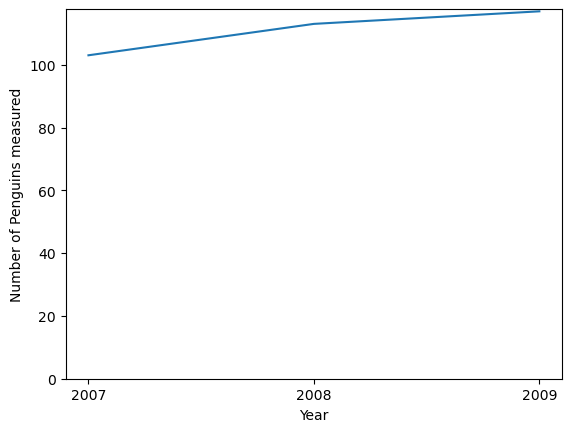

In [43]:
ax = sns.lineplot(df.value_counts("year"))
ax.set_ylim(0)
ax.set_xticks([2007, 2008, 2009])

ax.set_xlabel("Year")
ax.set_ylabel("Number of Penguins measured")

### Colours & Shapes
Now would be a good point to introduce the usage of colours and shapes in our plots.  
Of course, we can simply colour our plots as we like.  
For this use the `color` argument:

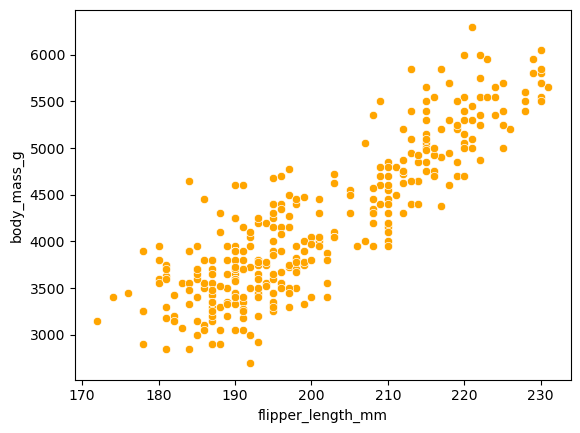

In [51]:
ax = sns.scatterplot(df, x="flipper_length_mm", y="body_mass_g", color="orange")

However, colour can do so much more.  
The `hue` argument allows you to *name* a column by which the points are coloured.

Because the commands are getting long now, we can split them over multiple lines so that we can read them better.  
(Remember that only code in parentheses can be split)

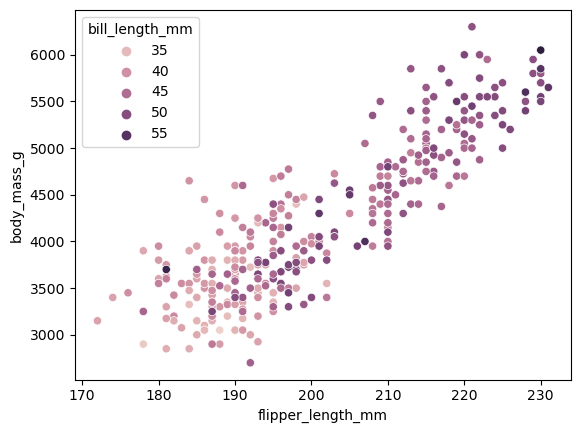

In [60]:
ax = sns.scatterplot(
    df,
    x="flipper_length_mm",
    y="body_mass_g",
    hue="bill_length_mm",
)

Customising the color palette of your plot is easy with the `palette` argument.  
By default, there are four such palettes, `"rocket"`, `"mako"`, `"flare"`, and `"crest"`, but you can create your own!

`seaborn` also allows you to use colours to distinguish discrete column values like `island`

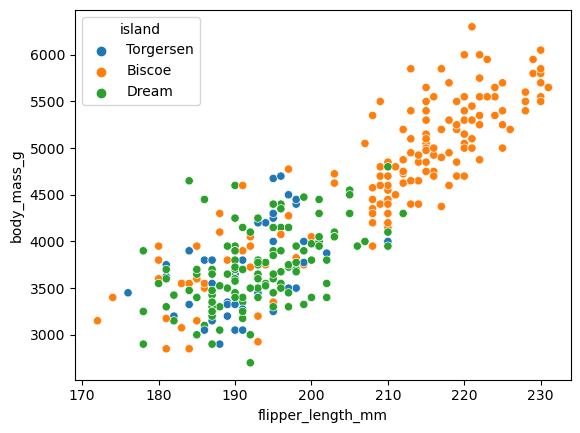

In [61]:
ax = sns.scatterplot(
    df,
    x="flipper_length_mm",
    y="body_mass_g",
    hue="island",
)

But for discrete values with few different values the `shape` is also a great way to distinguish.  
The seaborn argument for determining the shape from a column is `style`.

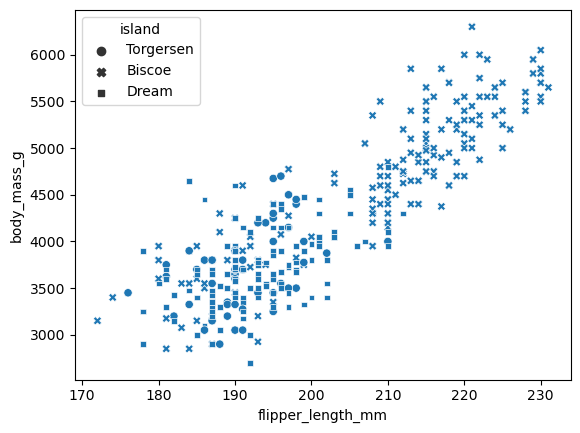

In [67]:
ax = sns.scatterplot(
    df,
    x="flipper_length_mm",
    y="body_mass_g",
    style="island"
)

And of course these arguments can be combined in one plot.  
This allows you to differentiate even more dimensions (columns) of your dataset or guide the readers better!  
For example, using the same vaiable for colour **and** style makes the points even easier to distinguish:

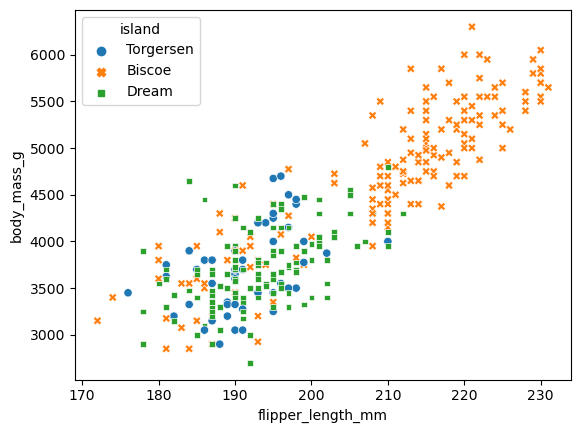

In [69]:
ax = sns.scatterplot(
    df,
    x="flipper_length_mm",
    y="body_mass_g",
    hue="island",
    style="island"
)

### Boxplot & Violinplot
### Heatmap